In [37]:
using CodecBzip2

In [38]:
using TensorToolbox, CommonFeatures, RData, LinearAlgebra, Statistics, Plots, Latexify, Dates

In [39]:
globaldata = load("globaldata.rda");
unpermuted = globaldata["matdata"];
mardata = permutedims(unpermuted, (3,2,1));

In [40]:
r̄ = [5,4,5,4];
maxiter = 500;
tucketa = 1e-03;
ϵ = 1e-03;
p = 1;

In [41]:
cendata = mardata .- mean(mardata, dims = 3);
stddata = cendata ./ std(cendata, dims = 3);

In [42]:
# Note that there is a difference of 0.01 in BIC between [1,3,2,4] and [1,3,3,4]. I choose [1,3,3,4]
tuckest = tuckerreg(cendata, [1,3,3,4]; eta = tucketa, maxiter, p, ϵ);

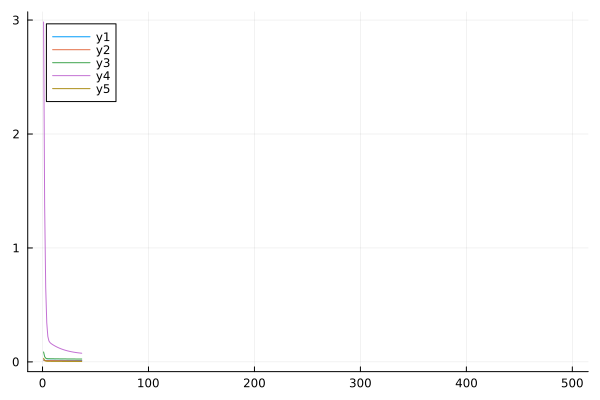

In [43]:
plot(tuckest.fullgrads)

# SCCF

- Countries go in the following order:
- USA, CAN, DEU, FRA, GBR
- Economic Indicators go in the following order:
- ir, GDP, prod, CPI

In [44]:
leftnull1 = CommonFeatures.leftnull(tuckest.U[1])
veccf = CommonFeatures.sccf(leftnull1)
matcommon = CommonFeatures.matsccf(veccf)
print(latexify(round.(matcommon', digits = 2)))

\begin{equation}
\left[
\begin{array}{ccccc}
1.0 & 0.85 & 0.74 & 0.79 & 0.77 \\
1.18 & 1.0 & 0.88 & 0.94 & 0.91 \\
1.34 & 1.14 & 1.0 & 1.07 & 1.03 \\
1.26 & 1.07 & 0.94 & 1.0 & 0.97 \\
1.3 & 1.1 & 0.97 & 1.03 & 1.0 \\
\end{array}
\right]
\end{equation}


In [45]:
δ1 = nullspace(tuckest.U[1]')

5×4 Matrix{Float64}:
 -0.453899  -0.397969  -0.424788  -0.411527
  0.865747  -0.11771   -0.125642  -0.12172
 -0.11771    0.896795  -0.110161  -0.106721
 -0.125642  -0.110161   0.882415  -0.113914
 -0.12172   -0.106721  -0.113914   0.889643

In [46]:
δ2 = nullspace(tuckest.U[2]')

4×1 Matrix{Float64}:
  5.2428623638666086e-5
  0.9427115588799915
 -0.31403961440819045
  0.11257901486356593

In [47]:
can = round.(δ1 * inv(δ1[[1,3,4,5], 1:4]), digits=2)'

4×5 adjoint(::Matrix{Float64}) with eltype Float64:
  1.0  -1.18  -0.0  0.0   0.0
 -0.0  -0.88   1.0  0.0  -0.0
 -0.0  -0.94  -0.0  1.0  -0.0
 -0.0  -0.91  -0.0  0.0   1.0

- First country moves with second (1.25)
- This is Canada and the USA

In [48]:
deu = round.(δ1 * inv(δ1[[1,2,4,5], 1:4]), digits = 2)

5×4 Matrix{Float64}:
  1.0   -0.0   -0.0   -0.0
 -0.0    1.0    0.0    0.0
 -1.34  -1.14  -1.07  -1.03
 -0.0   -0.0    1.0   -0.0
  0.0   -0.0   -0.0    1.0

- First moves with third (1.28)
- USA and Germany

In [49]:
fra = round.(δ1 * inv(δ1[[1,2,3,5], 1:4]), digits = 4)

5×4 Matrix{Float64}:
  1.0      0.0     -0.0      0.0
  0.0      1.0      0.0      0.0
  0.0      0.0      1.0      0.0
 -1.2585  -1.0685  -0.9369  -0.9688
 -0.0     -0.0     -0.0      1.0

- First moves with fourth (1.39)
- USA and France

In [50]:
gbr = round.(δ1 * inv(δ1[[1,2,3,4], 1:4]), digits = 4)

5×4 Matrix{Float64}:
  1.0      0.0     0.0      0.0
  0.0      1.0     0.0      0.0
 -0.0      0.0     1.0     -0.0
  0.0      0.0     0.0      1.0
 -1.2991  -1.103  -0.9671  -1.0322

In [51]:
usa = round.(δ1 * inv(δ1[[2,3,4,5], 1:4]), digits = 2)

5×4 Matrix{Float64}:
 -0.85  -0.74  -0.79  -0.77
  1.0    0.0   -0.0    0.0
  0.0    1.0    0.0    0.0
 -0.0    0.0    1.0   -0.0
 -0.0    0.0    0.0    1.0

- First moves with fifth (1.11)
- USA and GBR

Overall, it seems all countries move together

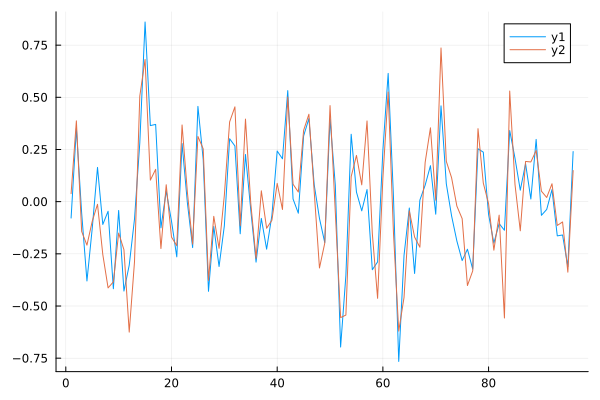

In [52]:
plot(cendata[[3, 5], 1,:]')

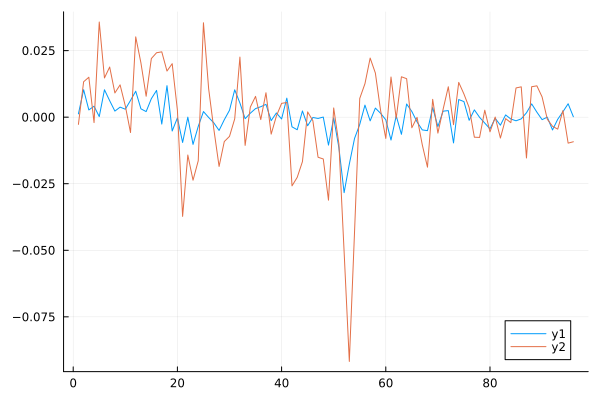

In [53]:
plot(hcat(cendata[1,2,:], cendata[2,3,:]))

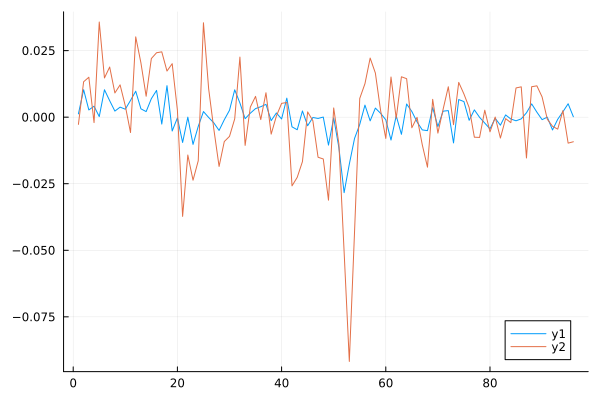

In [54]:
plot(hcat(cendata[1,2,:], cendata[2,3,:]))

In [55]:
1.18 * 0.33

0.3894

--------

In [56]:
δ2 = nullspace(tuckest.U[2]')

4×1 Matrix{Float64}:
  5.2428623638666086e-5
  0.9427115588799915
 -0.31403961440819045
  0.11257901486356593

In [57]:
gdp = round.(δ2 * inv(δ2[2]), digits = 2)

4×1 Matrix{Float64}:
  0.0
  1.0
 -0.33
  0.12

In [58]:
using Symbolics
@variables y11, y12, y13, y14, y15, y21, y22, y23, y24, y25, y31, y32, y33, y34, y35, y41, y42, y43, y44, y45
Y = [y11 y12 y13 y14 y15;
     y21 y22 y23 y24 y25;
     y31 y32 y33 y34 y35;
     y41 y42 y43 y44 y45]
Y * usa

4×4 Matrix{Num}:
 -0.85y11 + y12  -0.74y11 + y13  -0.79y11 + y14  -0.77y11 + y15
 -0.85y21 + y22  -0.74y21 + y23  -0.79y21 + y24  -0.77y21 + y25
 -0.85y31 + y32  -0.74y31 + y33  -0.79y31 + y34  -0.77y31 + y35
 -0.85y41 + y42  -0.74y41 + y43  -0.79y41 + y44  -0.77y41 + y45

In [59]:
resul = expand(gdp' * Y * usa)

1×4 Matrix{Num}:
 -0.85(y21 - 0.33y31 + 0.12y41) + y22 - 0.33y32 + 0.12y42  …  -0.77(y21 - 0.33y31 + 0.12y41) + y25 - 0.33y35 + 0.12y45

In [60]:
print(latexify(resul'))

\begin{equation}
\left[
\begin{array}{c}
 - 0.85 \left( y21 - 0.33 y31 + 0.12 y41 \right) + y22 - 0.33 y32 + 0.12 y42 \\
 - 0.74 \left( y21 - 0.33 y31 + 0.12 y41 \right) + y23 - 0.33 y33 + 0.12 y43 \\
 - 0.79 \left( y21 - 0.33 y31 + 0.12 y41 \right) + y24 - 0.33 y34 + 0.12 y44 \\
 - 0.77 \left( y21 - 0.33 y31 + 0.12 y41 \right) + y25 - 0.33 y35 + 0.12 y45 \\
\end{array}
\right]
\end{equation}


- There seems to only be comovements among the second and third indicator
- This is exactly the GDP and Industrial Production series
- GDP is 1/3 of IP
- Difficult to make because both GDP and IP are indices
- Seems like CPI and GDP are inversely related somewhat
- but CPI and IP are related

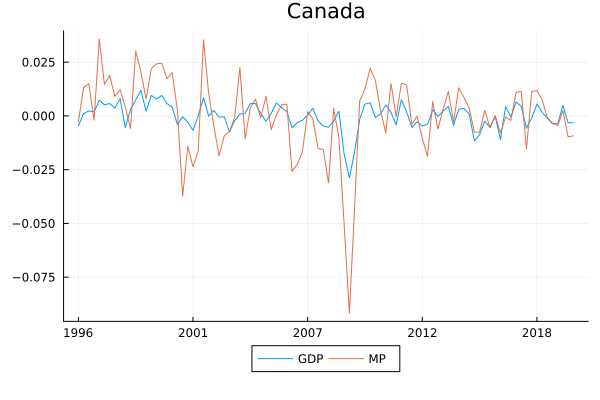

In [61]:
# Canada
# Define date range
start_date = Date(1996, 1, 1)
end_date = Date(2019, 12, 1)
date_range = collect(start_date:Month(3):end_date)
ticks = Dates.format.(date_range,"yyyy")
drang = 1:22:length(date_range)

# Format ticks as dates
plot(date_range, cendata[2, 2, :], label = "GDP", title = "Canada", xticks = (date_range[drang], ticks[drang]))
plot!(date_range, cendata[2, 3, :], label = "MP")
plot!(legend=:outerbottom, legendcolumns=2)
# savefig("canada.png")

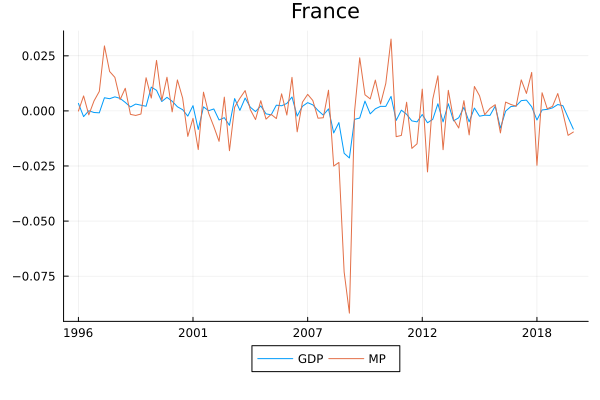

In [62]:
# France
# Define date range
start_date = Date(1996, 1, 1)
end_date = Date(2019, 12, 1)
date_range = collect(start_date:Month(3):end_date)
ticks = Dates.format.(date_range,"yyyy")
drang = 1:22:length(date_range)

# Format ticks as dates
plot(date_range, cendata[4, 2, :], label = "GDP", title = "France", xticks = (date_range[drang], ticks[drang]))
plot!(date_range, cendata[4, 3, :], label = "MP")
plot!(legend=:outerbottom, legendcolumns=2)
# savefig("france.png")

In [63]:
# plot(stddata[4, [1,4], :]')

---------

# Factor Model

In [33]:
origy, lagy = tlag(cendata, 1);

In [35]:
predfacs = ttm(ttm(lagy, tuckest.U[3]', 1), tuckest.U[4]', 2);
respfacs = ttm(ttm(origy, tuckest.U[1]', 1), tuckest.U[2]', 2);
size(respfacs)

(1, 3, 95)

In [36]:
size(predfacs)

(3, 4, 1, 95)

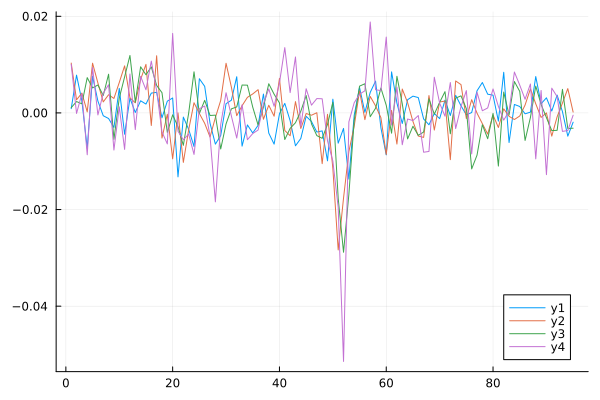

In [58]:
plot(hcat(predfacs[1,1,1,:], origy[1:3,2,:]'))

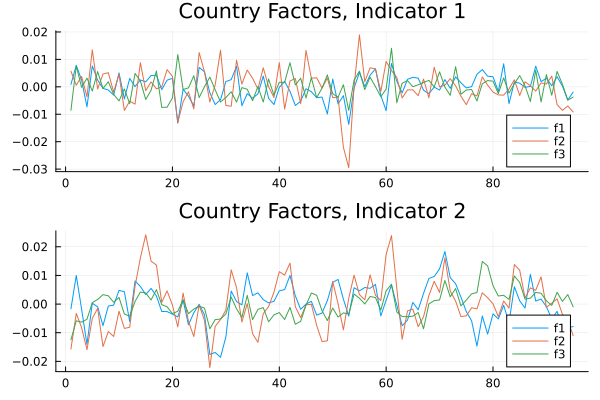

In [85]:
ci1 = plot(hcat(predfacs[1,1,1,:], -predfacs[2,1,1,:], -predfacs[3,1,1,:]), label = ["f1" "f2" "f3"], title = "Country Factors, Indicator 1")
ci2 = plot(hcat(predfacs[1,2,1,:], -predfacs[2,2,1,:], -predfacs[3,2,1,:]), label = ["f1" "f2" "f3"], title = "Country Factors, Indicator 2")
comb = plot(ci1, ci2, layout = (2,1))
# savefig(comb, "combinedplot.png")

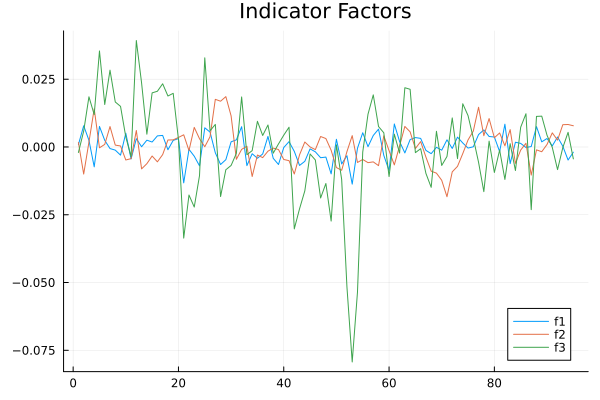

In [74]:
plot(hcat(predfacs[1,1,1,:], -predfacs[1,2,1,:], predfacs[1,3,1,:]), label = ["f1" "f2" "f3"], title = "Indicator Factors")

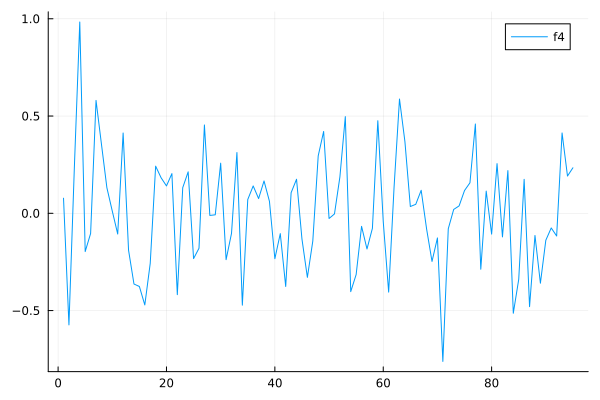

In [73]:
plot(predfacs[1,4,1,:], label = "f4")

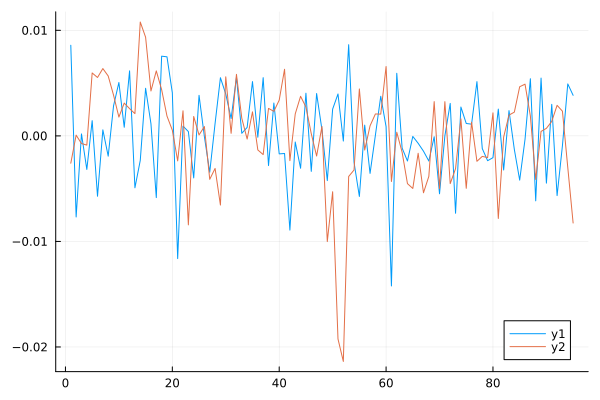

In [168]:
plot(hcat(predfacs[3,1,1,:], origy[4,2,:]))

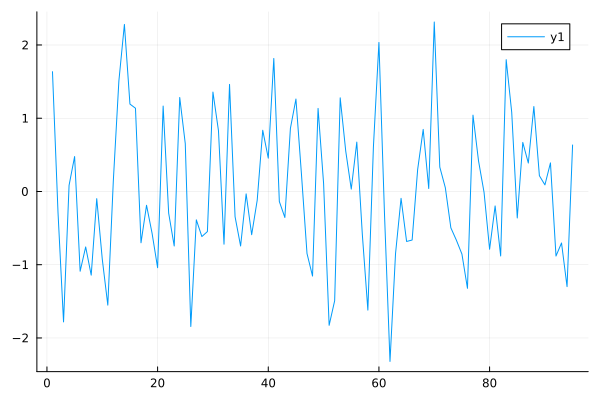

In [181]:
plot(respfacs[1,1,:] ./ std(respfacs[1,1,:]))

In [32]:
plot(hcat(plots(respfacs[1,1,:] ./ std(respfacs[1,1,:])), (predfacs[1,1,1,:] ./ std(predfacs[1,1,1,:]))))

LoadError: UndefVarError: `respfacs` not defined

- We have 2 country factor and 4 economic indicator factors

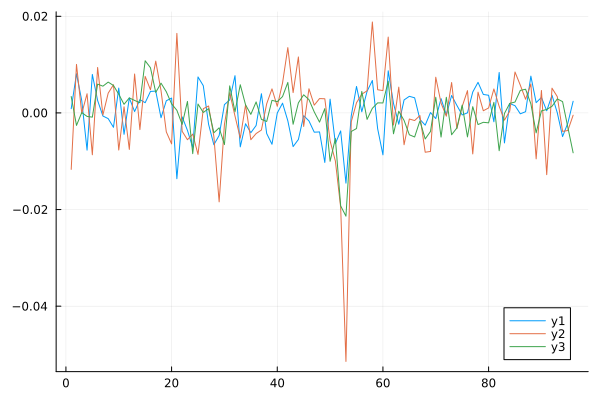

In [58]:
plot(hcat(marfacs[1,1,:], cendata[3:4,2,:]'))

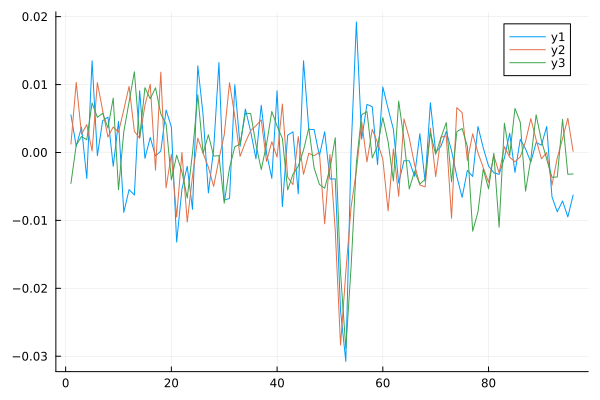

In [59]:
plot(hcat(-marfacs[2,1,:], cendata[1:2,2,:]'))

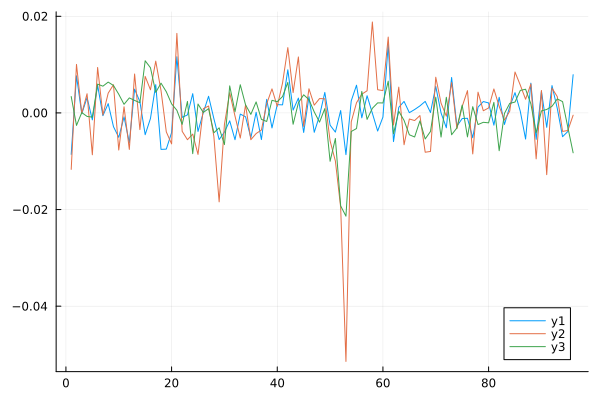

In [60]:
plot(hcat(-marfacs[3,1,:], cendata[3:4,2,:]'))

- The first two country factors is a combination of GDP for for every country

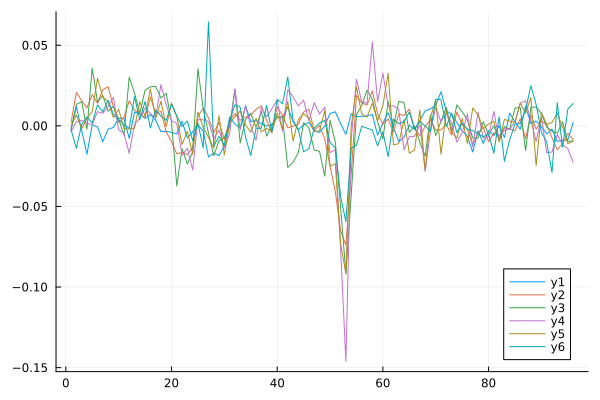

In [61]:
plot(hcat(marfacs[1,2,:], cendata[1:5,3,:]'))

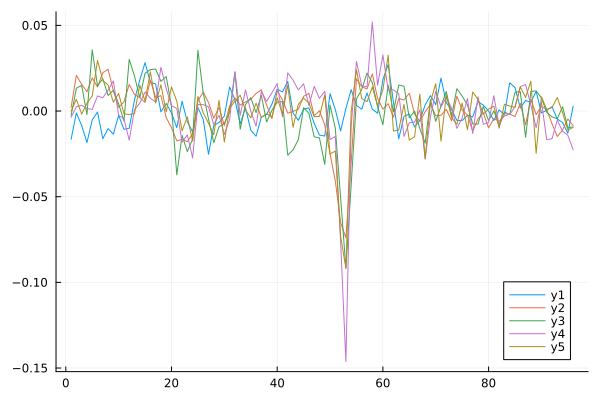

In [62]:
plot(hcat(-marfacs[2,2,:], cendata[1:4,3,:]'))

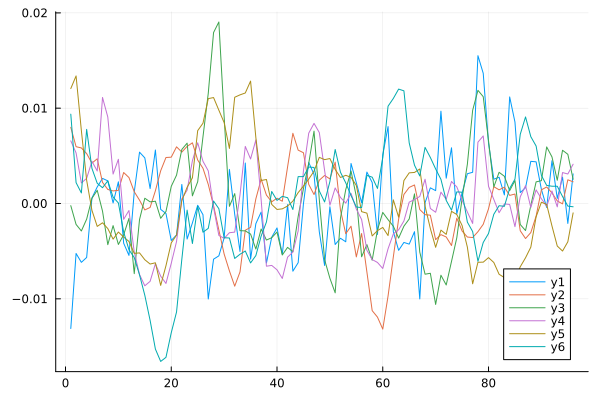

In [63]:
plot(hcat(-marfacs[3,2,:], cendata[1:5,4,:]'))

- The first country factor is approximately Canada CPI
- Second country factor is difficult to tell; ROW CPI?

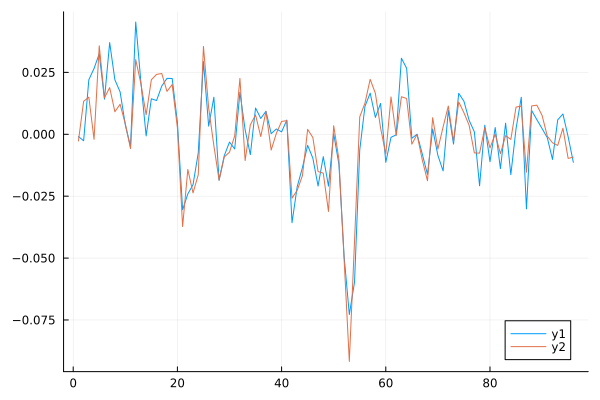

In [64]:
plot(hcat(marfacs[1,3,:], cendata[2, 3, :]))

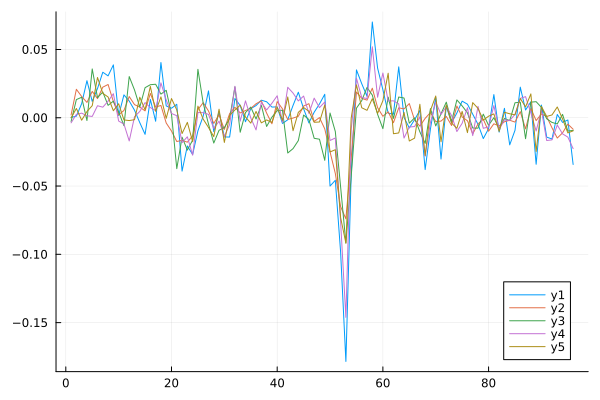

In [65]:
plot(hcat(-marfacs[2,3,:], cendata[1:4, 3, :]'))

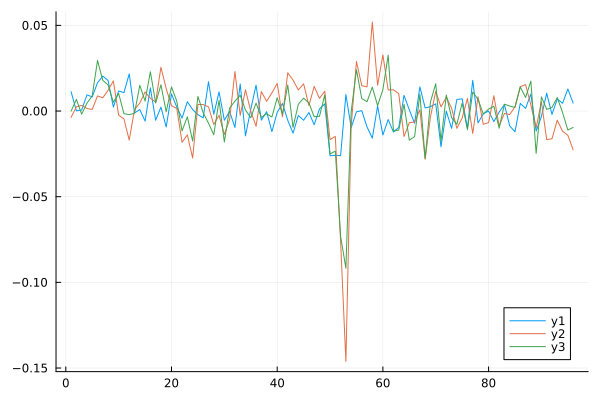

In [66]:
plot(hcat(-marfacs[3,3,:], cendata[3:4, 3, :]'))

- First factor is exactly Canada IP
- Second country factor is ROW IP

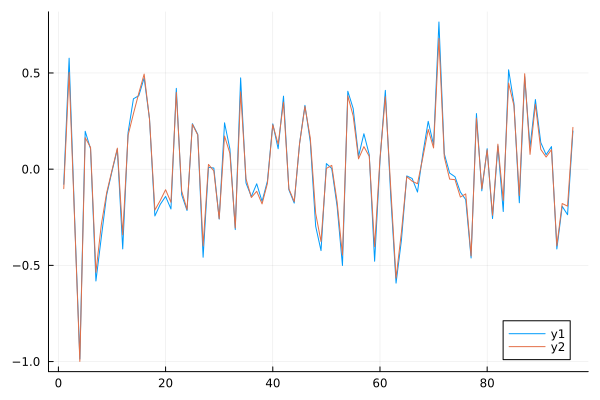

In [67]:
plot(hcat(-marfacs[1,4,:], cendata[2, 1, :]))

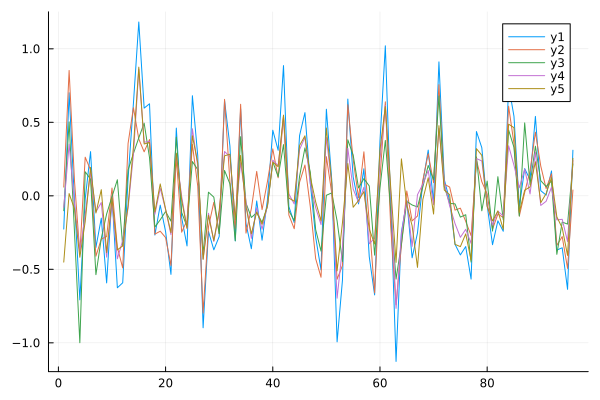

In [68]:
plot(hcat(marfacs[2,4,:], cendata[1:4, 1, :]'))

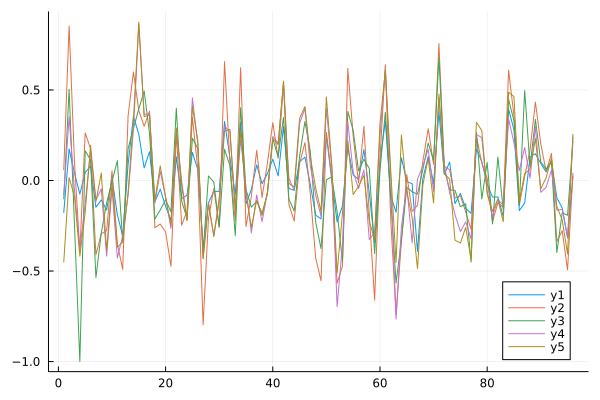

In [69]:
plot(hcat(marfacs[3,4,:], cendata[1:4, 1, :]'))

- This is the Interest Rate factor (Series 4)
- Separately for 2 countries
- The first country factor is Canada
- The second country factor is everything else

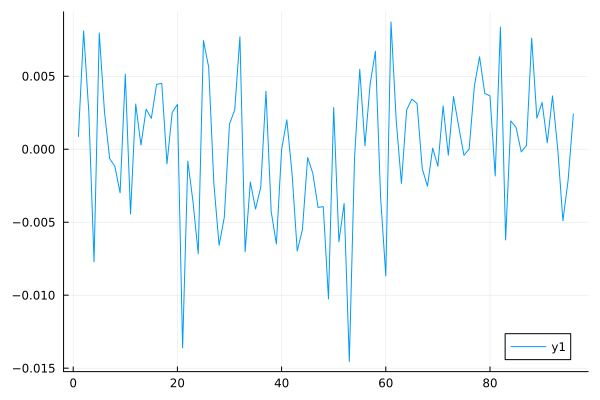

In [70]:
respfacs = ttm(ttm(

-------------

# Projection Matrices

In [108]:
tuckest.U1 * tuckest.U1'

5×5 Matrix{Float64}:
 0.285797  0.242654  0.212754  0.227092  0.220002
 0.242654  0.206024  0.180637  0.192811  0.186792
 0.212754  0.180637  0.158379  0.169052  0.163775
 0.227092  0.192811  0.169052  0.180445  0.174812
 0.220002  0.186792  0.163775  0.174812  0.169354

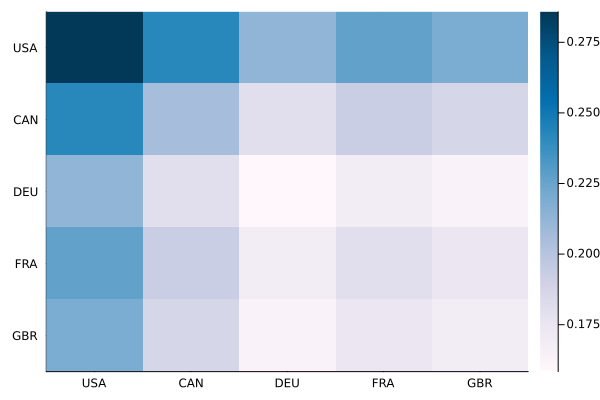

In [109]:
heatmap(["USA", "CAN", "DEU", "FRA", "GBR"], ["USA", "CAN", "DEU", "FRA", "GBR"], tuckest.U1 * tuckest.U1', c = :PuBu, yflip= true)

In [ ]:
# savefig(heatmap(["USA", "CAN", "DEU", "FRA", "GBR"], ["USA", "CAN", "DEU", "FRA", "GBR"], tuckest.U1 * tuckest.U1', c = :PuBu, yflip = true), "U1proj.png")

- Response Factor for Countries
- USA is an outlier as a response variable
- Canada is similar to the USA

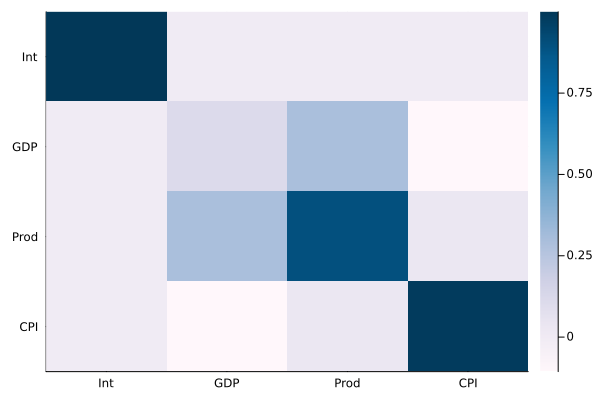

In [110]:
heatmap(["Int", "GDP", "Prod", "CPI"], ["Int", "GDP", "Prod", "CPI"], tuckest.U2 * tuckest.U2', c = :PuBu, yflip = true)

In [111]:
# savefig(heatmap(["Int", "GDP", "Prod", "CPI"], ["Int", "GDP", "Prod", "CPI"], tuckest.U2 * tuckest.U2', c = :PuBu, yflip = true), "U2proj.png")

- We have a grouping for Interest Rates, GDP/IP, then inflation CPI
- Response variables

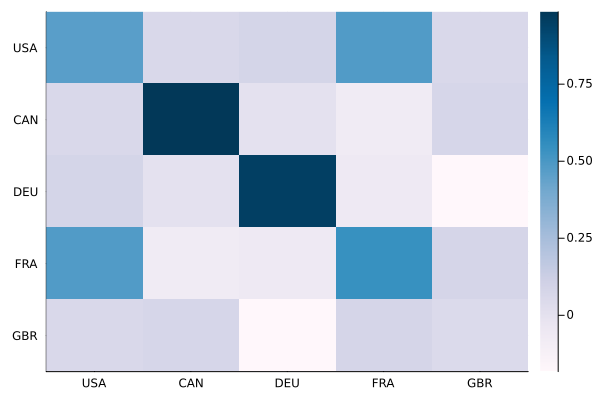

In [118]:
heatmap(["USA", "CAN", "DEU", "FRA", "GBR"], ["USA", "CAN", "DEU", "FRA", "GBR"], tuckest.U[3] * tuckest.U[3]', c = :PuBu, yflip = true)

In [113]:
# savefig(heatmap(["USA", "CAN", "DEU", "FRA", "GBR"], ["USA", "CAN", "DEU", "FRA", "GBR"], tuckest.U3 * tuckest.U3', c = :PuBu, yflip = true), "U3proj.png")

- Predictor Variable
- Canada and Germany serve as good predictors for this data set, with USA and France less so
- GBR does not predict well

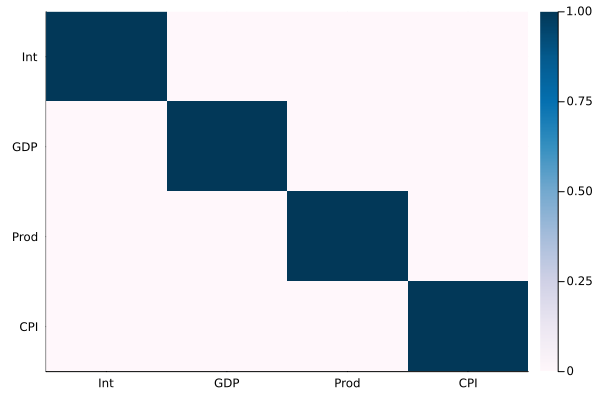

In [114]:
heatmap(["Int", "GDP", "Prod", "CPI"], ["Int", "GDP", "Prod", "CPI"], tuckest.U4 * tuckest.U4', c = :PuBu, yflip = true)

In [115]:
# savefig(heatmap(["Int", "GDP", "Prod", "CPI"], ["Int", "GDP", "Prod", "CPI"], tuckest.U4 * tuckest.U4', c = :PuBu, yflip = true), "U4proj.png")

- Every economic indicator helps in predicting values